# Equipe


*   Valéria Ribeiro dos Santos
*   Marcos Costa Antunes Afonso
*   Miguel Angelo Oliveira
*   Kaique Olegar Amaro



## Redes Neurais Artificiais 2024.1

- **Disciplina**: Redes Neurais Artificiais 2024.1  
- **Professora**: Elloá B. Guedes (ebgcosta@uea.edu.br)  
- **Github**: http://github.com/elloa  
        

Levando em conta a base de dados **_Forest Cover Type_**, esta segunda parte do Projeto Prático 2.2 diz respeito à proposição e avaliação de múltiplas redes neurais artificiais do tipo feedforward multilayer perceptron para o problema da classificação multi-classe da cobertura florestal em uma área do Roosevelt National Forest.

## Testando Redes Neurais sem os Atributos Categórios

1. Abra a base de dados em questão
2. Elimine todas as colunas relativas aos atributos categóricos
3. Armazene o atributo alvo em uma variável y e os atributos preditores em uma variável X
4. Efetue uma partição holdout 70/30 com o sklearn, distribuindo os exemplos de maneira aleatória
5. Efetue o escalonamento dos atributos

### Escalonando os atributos

O treinamento de uma rede neural artificial é mais eficiente quando os valores que lhes são fornecidos como entrada são pequenos, pois isto favorece a convergência. Isto é feito escalonando-se todos os atributos para o intervalo [0,1], mas precisa ser feito de maneira cautelosa, para que informações do conjunto de teste não sejam fornecidas no treinamento.

Há duas estratégias para tal escalonamento: normalização e padronização. Ambas possuem características particulares, vantagens e limitações, como é possível ver aqui: https://www.analyticsvidhya.com/blog/2020/04/feature-scaling-machine-learning-normalization-standardization/


No nosso caso, vamos usar a padronização. Assim, com os atributos preditores do treinamento, isto é, X_train, deve-se subtrair a média e dividir pelo desvio padrão:

X_train_std = (X_train - np.mean(X_train))/np.std(X_train)

Em seguida, o mesmo deve ser feito com os atributos preditores do conjunto de testes, mas com padronização relativa ao conjunto de treinamento:

X_test_std = (X_test - np.mean(X_train))/np.std(X_train)

Se todo o conjunto X for utilizado na padronização, a rede neural receberá informações do conjunto de teste por meio da média e variância utilizada para preparar os dados de treinamento, o que não é desejável.


### Continuando

5. Treine uma rede neural multilayer perceptron para este problema com uma única camada e dez neurônios  
    5.1 Utilize a função de ativação ReLU  
    5.2 Utilize o solver Adam    
    5.3 Imprima o passo a passo do treinamento    
    5.4 Utilize o número máximo de épocas igual a 300  
6. Com o modelo em questão, após o treinamento, apresente:  
    6.1 Matriz de confusão para o conjunto de teste  
    6.2 Acurácia  
    6.3 F-Score  
    6.4 Precisão  
    6.5 Revocação  
7. Repita o treinamento da mesma rede anterior sem imprimir o passo a passo (verbose False) por 10 vezes  
    7.1 Cada uma destas repetições deve ser feita com uma nova partição Holdout  
    7.2 Apresente a média e o desvio padrão da acurácia e do F-Score para o conjunto de treino  
8. Repita por 10 vezes o treinamento desta mesma rede, mas utilizando o otimizador SGD  
    8.1 Apresente a média e o desvio padrão da acurácia e do F-Score para o conjunto de treino  
9. Houve influência da escolha do otimizador no desempenho da rede?


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_classification
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix, accuracy_score, f1_score, precision_score, recall_score, accuracy_score
from prettytable import PrettyTable
from joblib import Parallel, delayed
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from joblib import Parallel, delayed

In [ ]:
def imprimir_tabelas(top3,cabecalho):
    tabela = PrettyTable()
    tabela.field_names = cabecalho
    for i, network in enumerate(top3):
        tabela.add_row([
            f"Top-{i+1}",
            network['hidden_layer_sizes'],
            network['activation'],
            network['solver'],
            network['max_iter'],
            f"{network['f_score']:.4f}",
            f"{network['accuracy']:.4f}",
            network['tp'],
            network['tn'],
            network['fp'],
            network['fn']
        ])


    print(tabela)

In [ ]:
df = pd.read_csv('covtype.csv')

In [ ]:
soloColunas = [col for col in df.columns if col.startswith('Soil_Type')]
florestaColunas = [col for col in df.columns if col.startswith('Wilderness_Area')]

df = df.drop(columns = soloColunas + florestaColunas)

df.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Cover_Type
0,2596,51,3,258,0,510,221,232,148,6279,5
1,2590,56,2,212,-6,390,220,235,151,6225,5
2,2804,139,9,268,65,3180,234,238,135,6121,2
3,2785,155,18,242,118,3090,238,238,122,6211,2
4,2595,45,2,153,-1,391,220,234,150,6172,5


In [ ]:
X = df.drop(columns = 'Cover_Type')
y = pd.DataFrame(df['Cover_Type'])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

X_train_std = (X_train - np.mean(X_train))/np.std(X_train)
X_test_std = (X_test - np.mean(X_train))/np.std(X_train)

/home/dialog/.local/lib/python3.10/site-packages/numpy/_core/fromnumeric.py:3800: FutureWarning: The behavior of DataFrame.std with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return std(axis=axis, dtype=dtype, out=out, ddof=ddof, **kwargs)


In [ ]:
clf = MLPClassifier(hidden_layer_sizes=(10,),random_state=1, max_iter=300, solver='adam', activation='relu', verbose=True).fit(X_train_std, y_train) #colocar 1 camada e 10 neuronios

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Iteration 1, loss = 1.97434660
Iteration 2, loss = 0.81579184
Iteration 3, loss = 0.76055581
Iteration 4, loss = 0.74722433
Iteration 5, loss = 0.74198813
Iteration 6, loss = 0.73874973
Iteration 7, loss = 0.73660337
Iteration 8, loss = 0.73488913
Iteration 9, loss = 0.73282200
Iteration 10, loss = 0.73075485
Iteration 11, loss = 0.72918972
Iteration 12, loss = 0.72778184
Iteration 13, loss = 0.72600547
Iteration 14, loss = 0.72456766
Iteration 15, loss = 0.72450595
Iteration 16, loss = 0.72357319
Iteration 17, loss = 0.72229579
Iteration 18, loss = 0.72147967
Iteration 19, loss = 0.72027375
Iteration 20, loss = 0.71999709
Iteration 21, loss = 0.71911776
Iteration 22, loss = 0.71872952
Iteration 23, loss = 0.71846674
Iteration 24, loss = 0.71710694
Iteration 25, loss = 0.71691058
Iteration 26, loss = 0.71663590
Iteration 27, loss = 0.71615296
Iteration 28, loss = 0.71596490
Iteration 29, loss = 0.71504018
Iteration 30, loss = 0.71434479
Iteration 31, loss = 0.71382059
Iteration 32, los

In [ ]:
clf.predict_proba(X_train_std[:1])

array([[2.88674781e-02, 7.64762151e-01, 5.19638779e-02, 1.70578988e-05,
        5.75385392e-02, 9.68508757e-02, 2.00734992e-08]])

In [ ]:
pred_clf = clf.predict(X_test_std)

In [ ]:
score = clf.score(X_train_std, y_train)

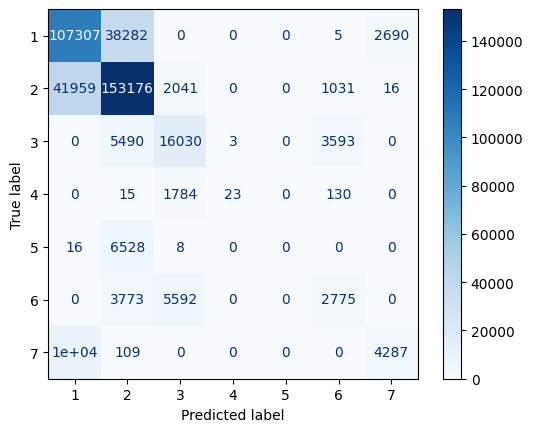

In [ ]:
disp = ConfusionMatrixDisplay.from_estimator(clf,X_train_std,y_train,cmap=plt.cm.Blues,)

plt.show()

In [ ]:
print('Acurácia:',accuracy_score(y_test, pred_clf))
print('F1-Score:', f1_score(y_test, pred_clf, average='macro'))
print('Precisão:', precision_score(y_test, pred_clf, zero_division=0,average='macro'))
print('Recall:', recall_score(y_test, pred_clf, average='macro'))

Acurácia: 0.6947402239765008
F1-Score: 0.39374565245998255
Precisão: 0.5669531241824611
Recall: 0.3777278912732519


### Holdouts

In [ ]:
def diff_holdout(X, y):
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
  X_train_std = (X_train - np.mean(X_train))/np.std(X_train)
  X_test_std = (X_test - np.mean(X_train))/np.std(X_train)
  return X_train, X_test, y_train, y_test, X_train_std, X_test_std

clfs_adam = [i for i in range(10)]
clfs_sgd = [i for i in range(10)]

In [ ]:
for i in range(0, 10):
  X_train, X_test, y_train, y_test, X_train_std, X_test_std = diff_holdout(X, y)
  clfs_adam[i] = MLPClassifier(hidden_layer_sizes=(10,), random_state=1, max_iter=300, solver='adam', activation='relu', verbose=False).fit(X_train_std, y_train)

/home/dialog/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1105: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/dialog/.local/lib/python3.10/site-packages/numpy/_core/fromnumeric.py:3800: FutureWarning: The behavior of DataFrame.std with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return std(axis=axis, dtype=dtype, out=out, ddof=ddof, **kwargs)
/home/dialog/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1105: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/dialog/.local/lib/python3.10/site-packages/numpy/

In [ ]:
for i in range(0, 10):
  X_train, X_test, y_train, y_test, X_train_std, X_test_std = diff_holdout(X, y)
  clfs_sgd[i] = MLPClassifier(hidden_layer_sizes=(10,), random_state=1, max_iter=300, solver='sgd', activation='relu', verbose=False).fit(X_train_std, y_train)

/home/dialog/.local/lib/python3.10/site-packages/numpy/_core/fromnumeric.py:3800: FutureWarning: The behavior of DataFrame.std with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return std(axis=axis, dtype=dtype, out=out, ddof=ddof, **kwargs)
/home/dialog/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1105: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/dialog/.local/lib/python3.10/site-packages/numpy/_core/fromnumeric.py:3800: FutureWarning: The behavior of DataFrame.std with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return std(axis=axis, dtype=dtype, out=out, ddof=ddof,

In [ ]:
accuracies_adam = []
f1_scores_adam = []

accuracies_sgd = []
f1_scores_sgd = []

for i in range (0, 10):

    y_train_pred_adam = clfs_adam[i].predict(X_train_std)
    y_train_pred_sgd = clfs_sgd[i].predict(X_train_std)

    accuracy_adam = accuracy_score(y_train, y_train_pred_adam)
    f1_adam = f1_score(y_train, y_train_pred_adam, average='weighted')

    accuracy_sgd = accuracy_score(y_train, y_train_pred_sgd)
    f1_sgd = f1_score(y_train, y_train_pred_sgd, average='weighted')

    accuracies_adam.append(accuracy_adam)
    f1_scores_adam.append(f1_adam)

    accuracies_sgd.append(accuracy_sgd)
    f1_scores_sgd.append(f1_sgd)

mean_accuracy_adam = np.mean(accuracies_adam)
std_accuracy_adam = np.std(accuracies_adam)
mean_f1_score_adam = np.mean(f1_scores_adam)
std_f1_score_adam = np.std(f1_scores_adam)

mean_accuracy_sgd = np.mean(accuracies_sgd)
std_accuracy_sgd = np.std(accuracies_sgd)
mean_f1_score_sgd = np.mean(f1_scores_sgd)
std_f1_score_sgd = np.std(f1_scores_sgd)

In [ ]:
print('Solver => Adam \n')
print(f"Mean Accuracy: {mean_accuracy_adam:.4f}")
print(f"Standard Deviation of Accuracy: {std_accuracy_adam:.4f}")
print(f"Mean F1 Score: {mean_f1_score_adam:.4f}")
print(f"Standard Deviation of F1 Score: {std_f1_score_adam:.4f}")

print('===========================================================')

print('\nSolver => Sgd \n')
print(f"Acurácia média: {mean_accuracy_sgd:.4f}")
print(f"Desvio padrão médio da Acurácia: {std_accuracy_sgd:.4f}")
print(f"F1 Score Médio: {mean_f1_score_sgd:.4f}")
print(f"Desvio padrão médio de F1 Score: {std_f1_score_sgd:.4f}")

Solver => Adam

Acurácia média: 0.6973
Desvio padrão médio da Acurácia: 0.0050
F1 Score Médio: 0.6844
Desvio padrão médio de F1 Score: 0.0064

Solver => Sgd

Acurácia média: 0.6848
Desvio padrão médio da Acurácia: 0.0686
F1 Score Médio: 0.5009
Desvio padrão médio de F1 Score: 0.1268



## Discussão

Nos passos anteriores, você avaliou o desempenho de uma única rede neural que contém os seguintes parâmetros: uma única camada oculta com 10 neurônios e função de ativação ReLU. O otimizador utilizado, quer seja SGD ou ADAM, trata-se do algoritmo para aproximar o gradiente do erro. Neste sentido, a escolha do otimizador é um hiperparâmetro, pois diz respeito a como a rede neural definida previamente atuará "em tempo de execução"  durante o processo de treinamento. Também são hiperparâmetros a quantidade de épocas, a taxa de aprendizado inicial, dentre outros.

Cabe alientar também que você efetuou o treinamento desta rede por 10 vezes e apresentou os resultados em termos de média +- desvio padrão. Lembre-se que em uma rede neural há a inicialização aleatória de pesos e, em consequência, o desempenho delas está sujeito à uma flutuação estocástica. A execução destas múltiplas vezes faz com que eliminemos algum viés introduzido por uma boa ou má "sorte" na escolha de pesos no caso de uma única execução.

Você também aprendeu uma estratégia para escalonar os atributos para uma melhor convergência da rede. Utilize-a em todos os treinamentos e testes propostos a seguir.

## Propondo Novas Arquiteturas

Variando  os parâmetros (uma ou duas camadas ocultas, com diferente números de neurônios em cada uma delas e a função de ativação) e o hiperparâmetros solver (Adam ou SGD) e o número de épocas (100,150 e 200), atenda ao que se pede:

1. Proponha 10 arquiteturas distintas de RNAs para o problema em questão, à sua escolha
2. Avalie cada uma das arquiteturas perante todos os hiperparâmetros apresentados por 100 vezes
3. Como resultado da avaliação, apresente:  
    3.1 Top-3 melhores redes no tocante à F-Score e Acurácia  
    3.2 Repetição em que houve o melhor desempenho de cada uma dessas redes: ilustre tp, tf, fp e fn  

In [ ]:
def evaluate_mlp(X_train, y_train, X_test, y_test, hidden_layer_sizes, activation, solver, max_iter):
    X_train, y_train, X_test, y_test = np.array(X_train, copy=True), np.array(y_train, copy=True), np.array(X_test, copy=True), np.array(y_test, copy=True)

    mlp = MLPClassifier(hidden_layer_sizes=hidden_layer_sizes, activation=activation, solver=solver, max_iter=max_iter,random_state=42)
    mlp.fit(X_train, y_train)

    y_pred = mlp.predict(X_test)

    if len(np.unique(y_train)) == 2:
            tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    else:
            mcm = multilabel_confusion_matrix(y_test, y_pred)
            tn = mcm[:, 0, 0].sum()
            fp = mcm[:, 0, 1].sum()
            fn = mcm[:, 1, 0].sum()
            tp = mcm[:, 1, 1].sum()

    return f1_score(y_test, y_pred, average='macro'), accuracy_score(y_test, y_pred), tp, tn, fp, fn

arquiteturas = [
    {'hidden_layer_sizes': (10,), 'activation': 'relu'},
    {'hidden_layer_sizes': (20,), 'activation': 'tanh'},
    {'hidden_layer_sizes': (10, 5), 'activation': 'relu'},
    {'hidden_layer_sizes': (20, 10), 'activation': 'tanh'},
    {'hidden_layer_sizes': (50,), 'activation': 'relu'},
    {'hidden_layer_sizes': (30,), 'activation': 'tanh'},
    {'hidden_layer_sizes': (50, 25), 'activation': 'relu'},
    {'hidden_layer_sizes': (100, 50), 'activation': 'tanh'},
    {'hidden_layer_sizes': (150, 100), 'activation': 'relu'},
    {'hidden_layer_sizes': (100, 100), 'activation': 'tanh'}
]

solvers = ['adam', 'sgd']
max_iters = [100, 150, 200]

def process_combination(hidden_layer_sizes, activation, solver, max_iter):
    f_score, accuracy, tp, tn, fp, fn = evaluate_mlp(X_train_std, y_train, X_test_std, y_test,
                                                     hidden_layer_sizes=hidden_layer_sizes,
                                                     activation=activation,
                                                     solver=solver,
                                                     max_iter=max_iter)
    return {
        'hidden_layer_sizes': hidden_layer_sizes,
        'activation': activation,
        'solver': solver,
        'max_iter': max_iter,
        'f_score': f_score,
        'accuracy': accuracy,
        'tp': tp,
        'tn': tn,
        'fp': fp,
        'fn': fn
    }

combinations = [
    (arq['hidden_layer_sizes'], arq['activation'], solver, max_iter)
    for arq in arquiteturas
    for solver in solvers
    for max_iter in max_iters
]

results = Parallel(n_jobs=-1)(delayed(process_combination)(hls, act, solver, max_iter) for hls, act, solver, max_iter in combinations)

/home/dialog/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1105: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/dialog/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1105: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/dialog/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1105: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/dialog/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1105: DataConversionWar

In [ ]:
imprimir_tabelas(arquiteturas, ['Rede','Arquitetura','Ativação','Solver','Épocas','F-Score','Acurácia','TP','TN','FP','FN'])

+-------+-------------+----------+--------+--------+---------+----------+--------+---------+-------+-------+
|  Rede | Arquitetura | Ativação | Solver | Épocas | F-Score | Acurácia |   TP   |    TN   |   FP  |   FN  |
+-------+-------------+----------+--------+--------+---------+----------+--------+---------+-------+-------+
| Top-1 |  (100, 100) |   tanh   |  adam  |  200   |  0.7484 |  0.8248  | 143771 | 1015291 | 30533 | 30533 |
| Top-2 |  (150, 100) |   relu   |  adam  |  200   |  0.7332 |  0.8105  | 141270 | 1012790 | 33034 | 33034 |
| Top-3 |  (100, 50)  |   tanh   |  adam  |  150   |  0.7097 |  0.8061  | 140508 | 1012028 | 33796 | 33796 |
+-------+-------------+----------+--------+--------+---------+----------+--------+---------+-------+-------+


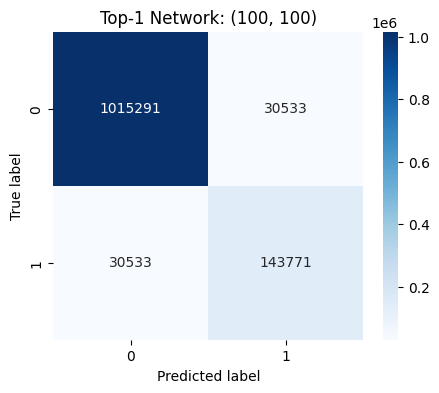

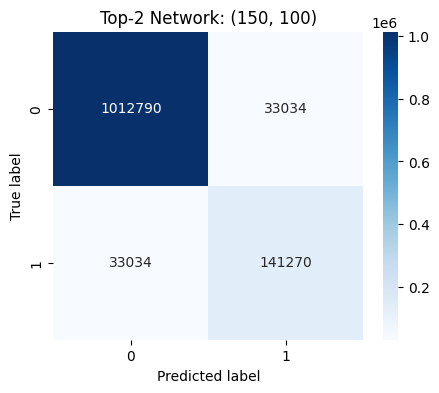

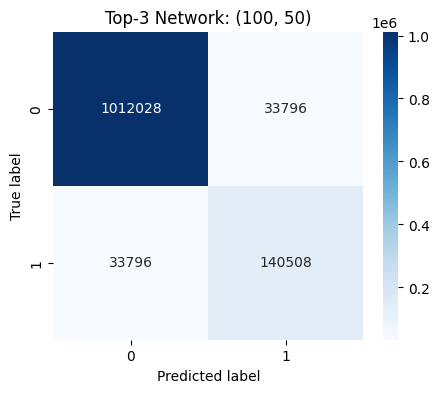

In [ ]:
def matriz(tp, tn, fp, fn, title):
    cm = np.array([[tn, fp], [fn, tp]])
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(title)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

for i, network in enumerate(arquiteturas):
    title = f"Top-{i+1} Network: {network['hidden_layer_sizes']}"
    matriz(network['tp'], network['tn'], network['fp'], network['fn'], title)


## Estimando o número de neurônios

Um dos problemas de pesquisa com redes neurais artificiais consiste na determinação do número de neurônios em sua arquitetura. Embora não seja possível definir a priori qual rede neural é adequada para um problema, pois isto só é possível mediante uma busca exaustiva, há regras na literatura que sugerem o número de neurônios escondidos, tal como a regra da Pirâmide Geométrica, dada a seguir:

$$N_h = \alpha \cdot \sqrt{N_i \cdot N_o},$$

em que $N_h$ é o número de neurônios ocultos (a serem distribuídos em uma ou duas camadas ocultas), $N_i$ é o número de neurônios na camada de entrada e $N_o$ é o número de neurônios na camada de saída.

1. Consulte a documentação da classe MLPClassifier (disponível em https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html) e obtenha os valores de $N_i$ e $N_o$.
2. Teste os valores de $\alpha$ como sendo iguais a $0.5$, $2$ e $3$.
3. Proponha pelo menos 30 redes neurais segundo a regra da pirâmide geométrica e teste-as nos mesmos termos estabelecidos anterioremente  (solver, épocas, etc.)  
    3.1 Apresente as top-3 melhores redes no tocante à F-Score e Acurácia  

In [ ]:
def Nh_valor(Ni,No,alfa):
  return int(alfa * (Ni * No) ** 0.5)

In [ ]:
val_alfa = [0.5, 2, 3]
Ni = X.shape[1]
No = len(np.unique(y))
resultados = []
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

for alfa in val_alfa:
    for i in range(10):
        Nh = Nh_valor(Ni, No,alfa)

        if i % 2 == 0:
            hidden_layer_sizes = (Nh,)
        else:
            hidden_layer_sizes = (Nh, Nh)

        mlp = MLPClassifier(hidden_layer_sizes=hidden_layer_sizes, solver='adam', max_iter=300, random_state=42)
        mlp.fit(X_train, y_train)

        y_pred = mlp.predict(X_test)
        acc = accuracy_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred, average='weighted')

        resultados.append((hidden_layer_sizes, acc, f1,mlp.n_iter_, alfa))


/home/dialog/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1105: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/dialog/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1105: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/dialog/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1105: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/dialog/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1105: DataConversionWar

In [ ]:
tres_melhores = []
historico = set()
resultados.sort(key=lambda x: (x[2], x[1]), reverse=True)
for result in resultados:
    architecture = result[0]
    if architecture not in historico:
        historico.add(architecture)
        tres_melhores.append(result)
    if len(tres_melhores) >= 3:
        break

imprimir_tabelas(tres_melhores, ["Top","Arquitetura", "Acurácia", "F-Score", "Épocas", "Alfa"])

+-----+-------------+--------------------+--------------------+--------+------+
| Top | Arquitetura |      Acurácia      |      F-Score       | Épocas | Alfa |
+-----+-------------+--------------------+--------------------+--------+------+
|  1  |   (25, 25)  | 0.7427425647145217 | 0.7339339136488462 |  167   |  3   |
|  2  |    (25,)    | 0.7158068661648614 | 0.7045672170897732 |  211   |  3   |
|  3  |    (16,)    | 0.7153880576464109 | 0.7024212759998157 |  242   |  2   |
+-----+-------------+--------------------+--------------------+--------+------+


## Testando as Redes Neurais com Atributos Categóricos

1. Considere as 6 redes neurais obtidas nos dois top-3 anteriores (arquiteturas próprias e regra da pirâmide geométrica)
2. Com todos os atributos preditores da base de dados original, incluindo os categóricos, treine e teste estas mesmas redes por 10 repetições  
    2.1 Considere o melhor otimizador para cada uma delas  
    2.2 Faça uso de 200 épocas para treinamento  
    2.2 Apresente os resultados de acurácia e F-Score em termos da média +- dp para cada arquitetura
3. Apresente o gráfico boxplot para o F-Score das 6 arquiteturas perante as 10 repetições

In [ ]:
def train_evaluate_mlp(X_train, X_test, y_train, y_test, architecture):
    X_train = np.array(X_train, copy=True)
    y_train = np.array(y_train, copy=True)
    X_test = np.array(X_test, copy=True)
    y_test = np.array(y_test, copy=True)

    clf = MLPClassifier(random_state=1, max_iter=200, solver='adam',
                        activation=architecture['fun'],
                        hidden_layer_sizes=architecture['hidden_layer_sizes'], verbose=False)
    clf.fit(X_train, y_train)

    y_pred = clf.predict(X_test)
    acuracia = accuracy_score(y_test, y_pred)
    fscore = f1_score(y_test, y_pred, average='weighted')
    return acuracia, fscore, clf


In [ ]:
col_categoricas = ['Soil_Type', 'Wilderness_Area']
col_numericas = X.columns.difference(col_categoricas)

numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, col_numericas),
        ('cat', categorical_transformer, col_categoricas)
    ])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)


In [ ]:
arquiteturas = [
    {'hidden_layer_sizes': (25, 25), 'fun': 'relu'},
    {'hidden_layer_sizes': (25,), 'fun': 'relu'},
    {'hidden_layer_sizes': (16,), 'fun': 'relu'},
    {'hidden_layer_sizes': (100, 100), 'fun': 'tanh'},
    {'hidden_layer_sizes': (150, 100), 'fun': 'relu'},
    {'hidden_layer_sizes': (100, 50), 'fun': 'tanh'}
]

repeticoes = 10

resultados_acuracia = []
resultados_fscore = []
treinamentos = []

def process_combination(architecture):
    acuracias = []
    fscores = []
    for repeticao in range(repeticoes):
        acuracia, fscore, clf = train_evaluate_mlp(X_train, X_test, y_train, y_test, architecture)
        acuracias.append(acuracia)
        fscores.append(fscore)
        treinamentos.append((clf, acuracia, X_train, y_train))

    media_acuracia = np.mean(acuracias)
    dp_acuracia = np.std(acuracias)
    media_fscore = np.mean(fscores)
    dp_fscore = np.std(fscores)

    return {
        'architecture': architecture,
        'media_acuracia': media_acuracia,
        'dp_acuracia': dp_acuracia,
        'media_fscore': media_fscore,
        'dp_fscore': dp_fscore
    }

# Paralelizar a execução das combinações
results = Parallel(n_jobs=-1)(delayed(process_combination)(architecture) for architecture in arquiteturas)

for result in results:
    resultados_acuracia.append((result['media_acuracia'], result['dp_acuracia']))
    resultados_fscore.append((result['media_fscore'], result['dp_fscore']))

/home/dialog/Documentos/Artificial_Intelligence/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1105: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/dialog/Documentos/Artificial_Intelligence/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1105: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/dialog/Documentos/Artificial_Intelligence/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1105: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/dialog/Documentos/Artificial_In

Arquitetura 1: {'hidden_layer_sizes': (25, 25), 'fun': 'relu'}
  Média Acurácia: 0.7518 (DP: 0.0000)
  Média F-score: 0.7482 (DP: 0.0000)
Arquitetura 2: {'hidden_layer_sizes': (25,), 'fun': 'relu'}
  Média Acurácia: 0.7157 (DP: 0.0000)
  Média F-score: 0.7106 (DP: 0.0000)
Arquitetura 3: {'hidden_layer_sizes': (16,), 'fun': 'relu'}
  Média Acurácia: 0.7037 (DP: 0.0000)
  Média F-score: 0.6909 (DP: 0.0000)
Arquitetura 4: {'hidden_layer_sizes': (200, 100), 'fun': 'tanh'}
  Média Acurácia: 0.7101 (DP: 0.0000)
  Média F-score: 0.6956 (DP: 0.0000)
Arquitetura 5: {'hidden_layer_sizes': (200, 100), 'fun': 'tanh'}
  Média Acurácia: 0.7101 (DP: 0.0000)
  Média F-score: 0.6956 (DP: 0.0000)
Arquitetura 6: {'hidden_layer_sizes': (200, 100), 'fun': 'tanh'}
  Média Acurácia: 0.7101 (DP: 0.0000)
  Média F-score: 0.6956 (DP: 0.0000)


In [ ]:
arquiteturas = ["(25, 25)", "(25,)","(16,)", "(100, 100)", "(150, 100)", "(100, 50)"]

table = PrettyTable()
table.field_names = ["Arquitetura", "F-Score Médio", "Acurácia Média"]

medias = [i for i in (result['media_acuracia'])]
f_scores = [i for i in (result['media_fscore]')]
for arq, f_score, medias in zip(arquiteturas, f_scores, medias):
    table.add_row([arq, f_score, medias])

print(table)

+-------------+---------------------------------+---------------------+
| Arquitetura |          F-Score Médio          |    Acurácia Média   |
+-------------+---------------------------------+---------------------+
|   (25, 25)  | 0.7482373733229848 (+- 0.06977) | 0.7518 (+- 0.06647) |
|    (25,)    | 0.7105651934310933 (+- 0.07106) | 0.7157 (+- 0.07009) |
|    (16,)    | 0.6908631567506002 (+- 0.06909) | 0.7037 (+- 0.06909) |
|  (100, 100) | 0.6955557512291527 (+- 0.07482) | 0.7101 (+- 0.07037) |
|  (150, 100) | 0.6937764909878873 (+- 0.07678) | 0.7107 (+- 0.07678) |
|  (100, 50)  | 0.6903647309291525 (+- 0.07550) | 0.6925 (+- 0.07400) |
+-------------+---------------------------------+---------------------+


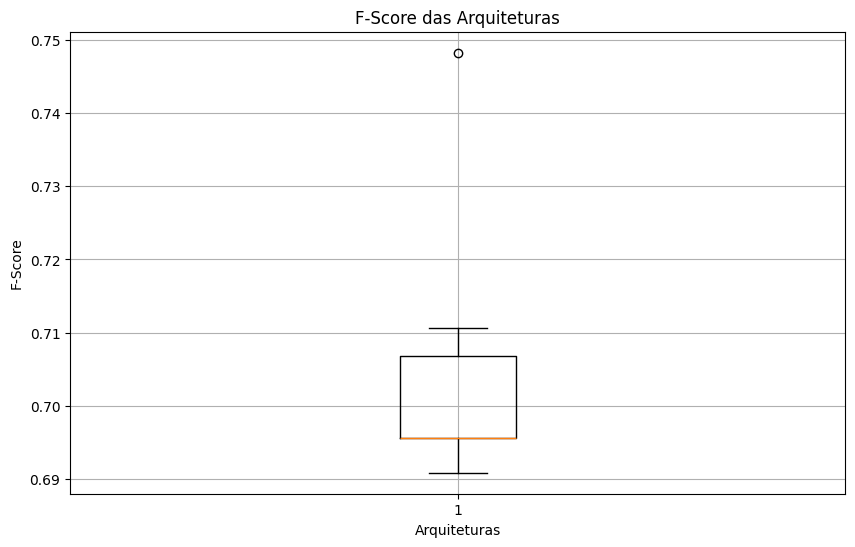

In [ ]:
fscores = [result['media_fscore'] for result in results]

plt.figure(figsize=(10, 6))
plt.boxplot(x = fscores)
plt.title('F-Score das Arquiteturas')
plt.xlabel('Arquiteturas')
plt.ylabel('F-Score')
plt.grid(True)
plt.show()

## Considerações Parciais

1. É possível identificar uma rede com desempenho superior às demais?
2. Qual estratégia mostrou-se mais producente para a obtenção de boas arquiteturas (Estratégia Própria ou Pirâmide Geométrica)? Por quê?
3. Considerar os atributos categóricos trouxe melhorias? Justifique.
4. Um número maior de épocas trouxe melhorias?
5. Qual a maior dificuldade de resolução do problema proposto perante as RNAs?

**1** Sim, é possível identificar uma rede com desempenho superior às demais. A arquitetura (25, 25) com função de ativação 'relu' mostrou-se superior, com um F-Score médio de 0.7482373733229848, superando as outras arquiteturas testadas na seção de teste com atributos categóricos em que foram comparadas as 6 melhores redes testadas. No teste sem atributos categóricos, entretanto, a configuração de mlp que apresentou melhor desempenho em relação ao F-Score foi a arquitetura (100, 100) com função de ativação 'tanh' e solver ADAM e F-Score de 0.7484.

**2** A estratégia de Pirâmide Geométrica parece ser mais producente para a obtenção de arquiteturas boas para o problema proposto, considerando que a melhores encontradas ((25, 25) com relu) foi calculada usando a abordagem piramidal e não possui uma quantidade tão grande de neurônios em suas cmadas quando comparadas às arquiteturas de Estratégia Própria. Isso sugere que esta estratégia pode ajudar a capturar padrões complexos sem aumentar excessivamente a complexidade computacional.

**3** Sim, considerar os atributos categóricos trouxe melhorias nos resultados. A inclusão de variáveis categóricas, com aplicação de OneHotEncoder, permite que a rede neural utilize informações adicionais que podem ser relevantes para a classificação do tipo de solo. Isso aumenta o conjunto de características utilizadas pelo modelo, resultando em uma melhor performance geral para a solução do problema, como é possível observar nos resultados de F-Score obtidos.

**4** Pôde-se observar que nem sempre um aumento no número de épocas trouxe melhorias. O resultado dos top 3 em relação ao número de épocas e arquiteturas mostra que diferentes arquiteturas podem convergir em diferentes quantidades de épocas (por exemplo, a arquitetura (25, 25) convergiu bem com 167 épocas, que é menor que o número máximo 300). Isso indica que um ajuste no número de épocas é necessário para cada arquitetura específica para evitar overfitting ou underfitting.

**5** A maior dificuldade na resolução do problema proposto perante as RNAs é a necessidade de ajuste dos hiperparâmetros, como o número de camadas, o número de neurônios por camada, a função de ativação, o solver, o número de repetições e a quantidade máxima de épocas. Além disso, outro desafio encontrado é a complexidade computacional, que pode aumentar significativamente com arquiteturas mais profundas e maiores conjuntos de dados. Isso pode dificultar os testes de hiperparâmetros realizados, visto que é necessário maior tempo e recursos disponíveis para os treinamentos.